**2)** Aplique a mesma técnica ao dataset abaixo e escolha o modelo de acordo com o ELPD LOO:

[Dataset do Tempo de Szeged no Kaggle](https://www.kaggle.com/datasets/budincsevity/szeged-weather)

Inclua também, para efeito de comparação, um modelo que não seja hierárquico.

In [ ]:
import pandas as pd
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [ ]:
df = pd.read_csv('weatherHistory.csv')
display(df)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
valores_vazios = df.isnull()
valores_sem_info = df.isna().sum()
print('\n Valores Vazios:', valores_vazios)
print('\n linhas sem informações', valores_sem_info)


 Valores Vazios:        Formatted Date  Summary  Precip Type  Temperature (C)  \
0               False    False        False            False   
1               False    False        False            False   
2               False    False        False            False   
3               False    False        False            False   
4               False    False        False            False   
...               ...      ...          ...              ...   
96448           False    False        False            False   
96449           False    False        False            False   
96450           False    False        False            False   
96451           False    False        False            False   
96452           False    False        False            False   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                         False     False              False   
1                         False     False              False   
2                    

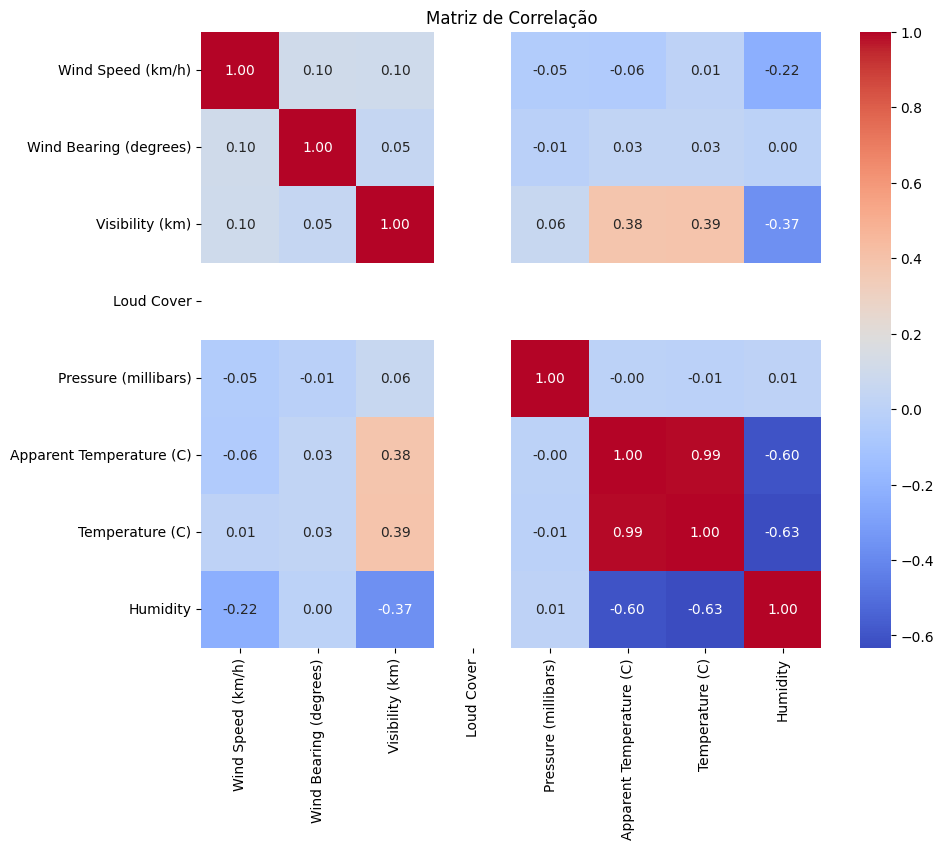

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


features = df[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
               'Loud Cover', 'Pressure (millibars)', 'Apparent Temperature (C)',
               'Temperature (C)', 'Humidity']]

correlation_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

features = df[[	'Wind Speed (km/h)',	'Visibility (km)',	'Apparent Temperature (C)','Temperature (C)','Humidity']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled

array([[ 0.47863499,  1.30697578, -0.32403547, -0.25759902,  0.79347043],
       [ 0.49959388,  1.30697578, -0.3390971 , -0.26981351,  0.63999555],
       [-0.99547337,  1.09958576, -0.13810226, -0.26748694,  0.79347043],
       ...,
       [-0.2642411 ,  1.37226523,  1.04553403,  1.0580761 , -0.89475327],
       [-0.04067964,  1.37226523,  0.99723295,  1.00398335, -0.6901201 ],
       [-0.71369278,  1.23400522,  0.89595648,  0.89056308, -0.6389618 ]])

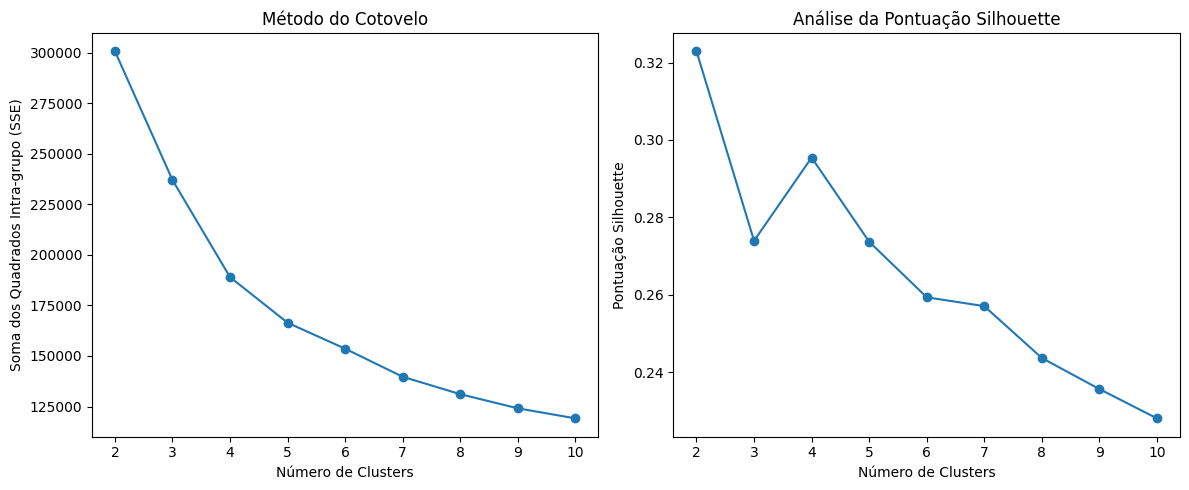

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, labels))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Intra-grupo (SSE)')
plt.title('Método do Cotovelo')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação Silhouette')
plt.title('Análise da Pontuação Silhouette')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(features_scaled)

df['cluster'] = cluster
display(df)



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,cluster
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,1
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,1
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,1
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,1


In [ ]:
df.columns = df.columns.str.replace(r'[\(\)]', '', regex=True)
df.columns = [col.replace(" ", "_") for col in df.columns]
display(df)

,Formatted_Date,Summary,Precip_Type,Temperature_C,Apparent_Temperature_C,Humidity,Wind_Speed_km/h,Wind_Bearing_degrees,Visibility_km,Loud_Cover,Pressure_millibars,Daily_Summary,cluster
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,1
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,1
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,1
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,1


In [ ]:
df.to_csv('weatherHistory_cluster.csv', index=False)

In [ ]:
df_2 = pd.read_csv('weatherHistory_cluster.csv')
display(df_2)

,Formatted_Date,Summary,Precip_Type,Temperature_C,Apparent_Temperature_C,Humidity,Wind_Speed_km/h,Wind_Bearing_degrees,Visibility_km,Loud_Cover,Pressure_millibars,Daily_Summary,cluster
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,1
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,1
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,1
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,1


In [ ]:
temp = df_2['Temperature_C'].values
humidity = df_2['Humidity'].values
wind_speed = df_2['Wind_Speed_km/h'].values #y
wind_bearing = df_2['Wind_Bearing_degrees'].values
cluster = df_2['cluster']



In [ ]:
with pm.Model() as hierarchical_model_v1:
    b_temp = pm.Normal('b_temp', mu=0, sigma=10)
    b_humidity = pm.Normal('b_humidity', mu=0, sigma=10)
    b_wind_bearing  = pm.Normal('b_wind_bearing ', mu=0, sigma=100)
    sigma = pm.HalfNormal('sigma', sigma=10)

    a = pm.Normal('a', mu=0, sigma=10, shape=2)

    mu = a[cluster] +  b_temp  * temp + b_humidity * humidity + b_wind_bearing * wind_bearing

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed= wind_speed)

In [ ]:
with hierarchical_model_v1:
  trace = pm.sample()

Output()

In [ ]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],21.478,0.132,21.227,21.716,0.005,0.004,677.0,665.0,1.00
a[1],20.381,0.133,20.131,20.626,0.005,0.004,657.0,756.0,1.01
b_humidity,-13.550,0.138,-13.806,-13.298,0.005,0.004,689.0,777.0,1.00
b_temp,-0.126,0.004,-0.132,-0.119,0.000,0.000,1103.0,867.0,1.00
b_wind_bearing,0.007,0.000,0.007,0.008,0.000,0.000,1490.0,1274.0,1.00
sigma,6.578,0.015,6.547,6.605,0.000,0.000,1406.0,1194.0,1.00


In [ ]:
import arviz as az

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'b_humidity'}>,
        <Axes: title={'center': 'b_humidity'}>],
       [<Axes: title={'center': 'b_temp'}>,
        <Axes: title={'center': 'b_temp'}>],
       [<Axes: title={'center': 'b_wind_bearing '}>,
        <Axes: title={'center': 'b_wind_bearing '}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

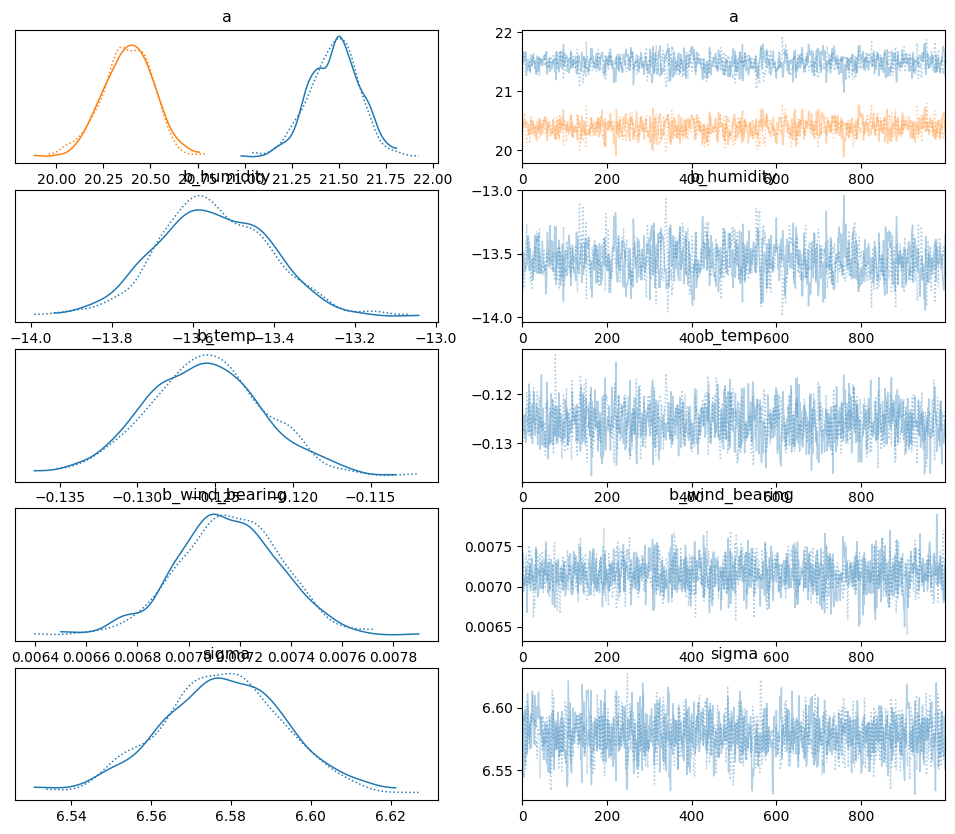

In [ ]:
az.plot_trace(trace)

In [ ]:
with pm.Model() as multi_linreg:

    alpha = pm.Normal('alpha', 0, 10)
    b_temp = pm.Normal('b_temp', mu=0, sigma=10)
    b_humidity = pm.Normal('b_humidity', mu=0, sigma=10)
    b_wind_bearing  = pm.Normal('b_wind_bearing ', mu=0, sigma=100)
    epsilon = pm.HalfNormal('epsilon', 10)

    mu = alpha +  b_temp  * temp + b_humidity * humidity + b_wind_bearing * wind_bearing
    Y_obs = pm.Normal('Y_obs', mu, epsilon, observed= wind_speed)

In [ ]:
with multi_linreg:
  trace_3 = pm.sample()

Output()

In [ ]:
pm.summary(trace_3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,21.022,0.132,20.770,21.266,0.005,0.003,834.0,1087.0,1.0
b_humidity,-13.047,0.139,-13.315,-12.789,0.005,0.003,892.0,1187.0,1.0
b_temp,-0.165,0.003,-0.170,-0.159,0.000,0.000,1024.0,1300.0,1.0
b_wind_bearing,0.007,0.000,0.007,0.008,0.000,0.000,1467.0,929.0,1.0
epsilon,6.586,0.015,6.557,6.613,0.000,0.000,1365.0,1199.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'b_humidity'}>,
        <Axes: title={'center': 'b_humidity'}>],
       [<Axes: title={'center': 'b_temp'}>,
        <Axes: title={'center': 'b_temp'}>],
       [<Axes: title={'center': 'b_wind_bearing '}>,
        <Axes: title={'center': 'b_wind_bearing '}>],
       [<Axes: title={'center': 'epsilon'}>,
        <Axes: title={'center': 'epsilon'}>]], dtype=object)

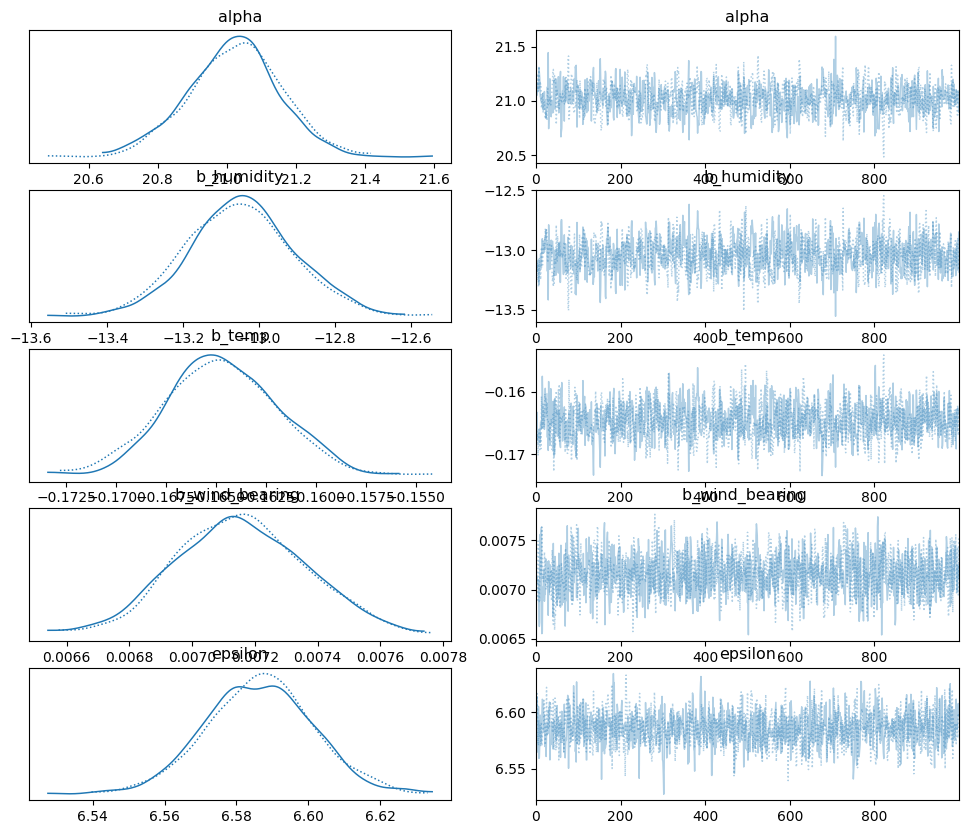

In [ ]:
az.plot_trace(trace_3)

In [ ]:
with hierarchical_model_v1:
    pm.compute_log_likelihood(trace)

with multi_linreg:
    pm.compute_log_likelihood(trace_3)

Output()

Output()

In [ ]:
model_compare = az.compare(
    {
        "Hierarchical 1": trace,
        "multi_linreg": trace_3
    }, method='BB-pseudo-BMA'
)


In [ ]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Hierarchical 1,0,-318559.734240,7.076785,0.000000,1.000000e+00,305.699237,0.00000,False,log
multi_linreg,1,-318676.780366,5.995817,117.046126,2.850887e-31,305.555624,15.70872,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

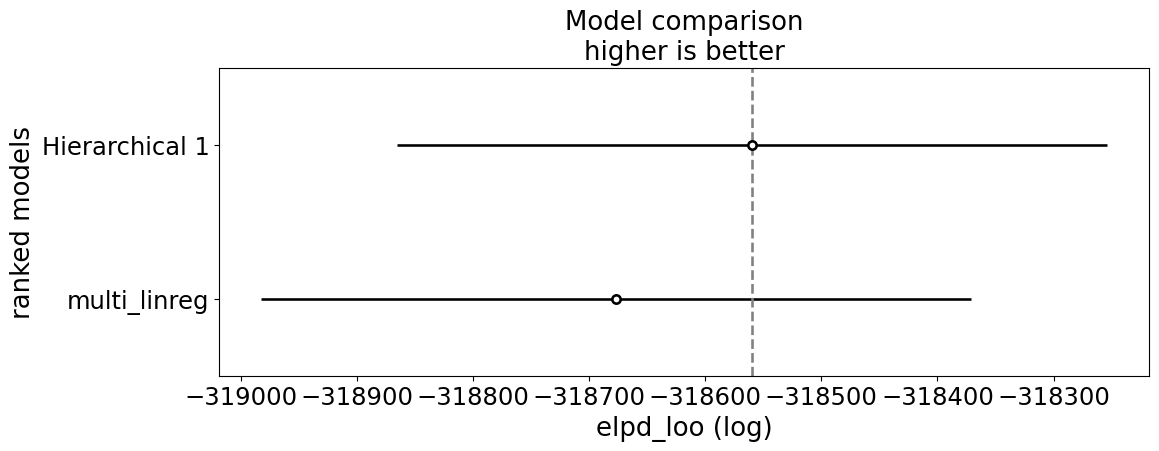

In [ ]:
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [ ]:
with hierarchical_model_v1:
  trace_hm = pm.sample_posterior_predictive(trace)

Output()

Melhor modelo foi o hierarchical_model